# WeatherPy
----

#### Analysis
* As expected, temperatures increase as you get closer to the equator, but max temperatures are in the tropical latitudes surrounding the equator (20-40). The short reason for this is that warm air rises at the equator and then cools, forming precipitation at the equator (cooling temperatures). The dry air then moves down to further latitudes and heats up again, but since it is dry, there is no precipation. 
* Latitude does not seem to have an effect on humidity or cloudiness. This makes sense intuitively, as the other geographical factors influence these measures, such as altitude, proximity to bodies of water, etc. 
* Wind speed appears to slightly increase as we move further away from the equator into the northern hemisphere. While our dataset does not sufficiently explain this, a possible reason could be higher altitudes/ranges in the north, but this would need to be explored further.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "weatherpy_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set parameters
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Build lists for getting data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start counter
counter = 1

# Print log of api requests
print(f"Beginning Data Retrieval")
print(f"----------------------------")

# Loop through city list and get weather data
for city in cities:
    
    try:
        # Get weather data
        weather_response = requests.get(f"{url}&q={city}").json()
        city_name.append(weather_response["name"])
        cloudiness.append(weather_response["clouds"]["all"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        humidity.append(weather_response["main"]["humidity"])
        lat.append(weather_response["coord"]["lat"])
        lng.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        wind_speed.append(weather_response["wind"]["speed"])
        city_log = weather_response["name"]
        print(f"Processing record {counter} | {city_log}")
        print(f"{url}&q={city}")
      
        # Increase counter
        counter = counter + 1
        
        # One second delay to not exceed rate limit of API
        time.sleep(1.01)
        
        # If city not found, skip it and continue api requests
    except:
        print("City not found. Skipping...")
        print(f"{url}&q={city}")
    continue

Beginning Data Retrieval
----------------------------
Processing record 1 | Pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=pangnirtung
Processing record 2 | Kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=kodiak
Processing record 3 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=busselton
Processing record 4 | Beyneu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=beyneu
Processing record 5 | Chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=chapais
Processing record 6 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=saint%20george
Processing record 7 | Toba
http://api.openweathermap.org/data/2.5/weather?units=

Processing record 51 | Tommot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=tommot
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=doctor%20pedro%20p.%20pena
Processing record 52 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=rikitea
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=palabuhanratu
Processing record 53 | Aksha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=aksha
Processing record 54 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=jamestown
Processing record 55 | Bay Roberts
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1

Processing record 102 | Iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=iqaluit
Processing record 103 | Mezen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=mezen
Processing record 104 | Catabola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=catabola
Processing record 105 | Alugan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=alugan
Processing record 106 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=port%20elizabeth
Processing record 107 | Lerwick
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=lerwick
Processing record 108 | Filingue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1c

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=amderma
Processing record 156 | Scottsbluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=scottsbluff
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=bandar-e%20torkaman
Processing record 157 | Nuuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=nuuk
Processing record 158 | Derzhavinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=derzhavinsk
Processing record 159 | San Juan de la Maguana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=san%20juan%20de%20la%20maguana
Processing record 160 | Port Hedland
http://api.openweathermap.org/data/2.5/weather?units=

Processing record 206 | Grand Gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=grand%20gaube
Processing record 207 | Dzhebariki-Khaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=dzhebariki-khaya
Processing record 208 | Susangerd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=susangerd
Processing record 209 | San Quintin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=san%20quintin
Processing record 210 | Guiglo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=guiglo
Processing record 211 | Bud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=bud
Processing record 212 | Ilawe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b00

Processing record 257 | Huainan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=huainan
Processing record 258 | Dudinka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=dudinka
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=hamadan
Processing record 259 | Arman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=arman
Processing record 260 | Gilbues
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=gilbues
Processing record 261 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=ponta%20do%20sol
Processing record 262 | Kantang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=k

Processing record 309 | Nantucket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=nantucket
Processing record 310 | Ishigaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=ishigaki
Processing record 311 | Hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=hofn
Processing record 312 | Sao Felix do Xingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=sao%20felix%20do%20xingu
Processing record 313 | Cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=cherskiy
Processing record 314 | Souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=souillac
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004f

Processing record 356 | Ukiah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=ukiah
Processing record 357 | Camenca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=camenca
Processing record 358 | Veinticinco de Mayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=veinticinco%20de%20mayo
Processing record 359 | Fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=fortuna
Processing record 360 | Kuvandyk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=kuvandyk
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=thilogne
Processing record 361 | Nongstoin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b

Processing record 405 | Yalta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=yalta
Processing record 406 | La Ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=la%20ronge
Processing record 407 | Road Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=road%20town
Processing record 408 | Morros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=morros
Processing record 409 | Margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=margate
Processing record 410 | Puerto Cabezas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=puerto%20cabezas
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0ae

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=sorvag
Processing record 456 | Talavera de la Reina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=talavera%20de%20la%20reina
Processing record 457 | Victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=victoria
Processing record 458 | Ugoofaaru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=ugoofaaru
Processing record 459 | Okato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=okato
Processing record 460 | Kargopol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=kargopol
Processing record 461 | Ola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe

Processing record 505 | Biltine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=biltine
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=haibowan
Processing record 506 | Presque Isle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=presque%20isle
Processing record 507 | Maceio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=maceio
Processing record 508 | Maple Creek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=maple%20creek
Processing record 509 | Kalianget
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=kalianget
Processing record 510 | Artyom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbd

Processing record 558 | Oktyabrskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=oktyabrskoye
Processing record 559 | Ayan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=ayan
Processing record 560 | Tezu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=tezu
Processing record 561 | Bucerias
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=bucerias
Processing record 562 | Zamania
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=zamania
Processing record 563 | Sukhobezvodnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1ce10&q=sukhobezvodnoye
Processing record 564 | Vila
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a3ce9808b004fe7b7efbda0aec1c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_weather = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
} 

weatherpy_df = pd.DataFrame(city_weather)

weatherpy_df.count()

City          575
Cloudiness    575
Country       575
Date          575
Humidity      575
Lat           575
Lng           575
Max Temp      575
Wind Speed    575
dtype: int64

In [7]:
weatherpy_df.to_csv("weatherpy_data.csv")

weatherpy_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Pangnirtung,90,CA,1566831760,71,66.15,-65.72,51.80,14.99
1,Kodiak,90,US,1566831761,93,39.95,-94.76,66.20,3.36
2,Busselton,2,AU,1566831450,58,-33.64,115.35,46.00,12.55
3,Beyneu,100,KZ,1566831764,29,45.32,55.19,80.16,8.93
4,Chapais,1,CA,1566831492,60,49.78,-74.86,68.00,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

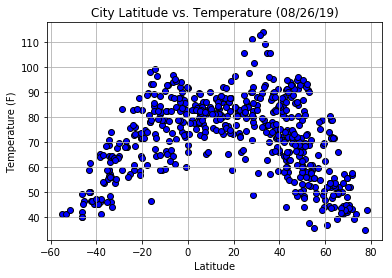

In [14]:
plt.scatter(weatherpy_df["Lat"], weatherpy_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Temperature (08/26/19)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig("latitude_temp.png")

#### Latitude vs. Humidity Plot

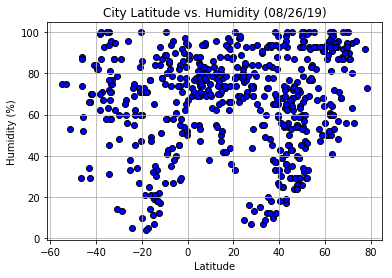

In [15]:
plt.scatter(weatherpy_df["Lat"], weatherpy_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Humidity (08/26/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("latitude_humidity.png")

#### Latitude vs. Cloudiness Plot

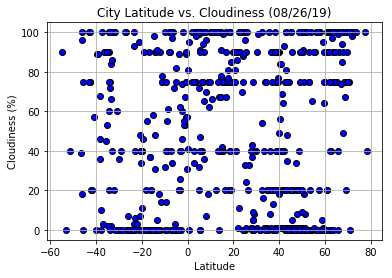

In [16]:
plt.scatter(weatherpy_df["Lat"], weatherpy_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (08/26/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("latitude_cloudiness.png")

#### Latitude vs. Wind Speed Plot

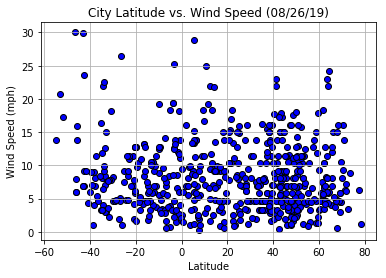

In [17]:
plt.scatter(weatherpy_df["Lat"], weatherpy_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (08/26/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("latitude_windspeed.png")